In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from scipy.optimize import fsolve


In [2]:
def ddV(x):
    return (-16.8 + 19.2*x - 4.8*x**2)/(math.exp((-2 + x)**2)) + (2. - 4.0 * x**2)/(math.exp(x**2))
def dV(x):
    return 2*math.exp(-x**2)* x + 2.4 * math.exp(-(x - 2)**2) * (x - 2)

In [3]:
m = 1 #kg
v0 = 0
x0 = 2.8 #m
n = 0
A = np.zeros((20,2,2))
B = np.ones((20,2,1))
dt = 0.01
alpha = 0
T = 100

In [4]:
def matrix(dt,x0,v0,x,v,a,i):
    A[i][0][0] = 1
    A[i][0][1] = -dt/2
    A[i][1][0] = (dt/2*m) * ddV(x)
    A[i][1][1] = 1 + a*dt/2

    B[i][0][0] = x - x0 - dt/2 * v - dt/2 * v0
    B[i][1][0] = v - v0 -dt/2 * (-1/m * dV(x) - a * v) - dt/2 * (-1/m * dV(x0) - a * v0)
    
    return np.linalg.solve(A[i],B[i])


In [5]:
x0 = 2.8
v0 = 0
z = 1
y = 1
dt = 0.01
print("Warość początkowa x i v:",z,y)
for i in range(4):
    b12 = matrix(dt,x0,v0,z,y,0,i)
    z = z - b12[0]
    y = y - b12[1]
    print("x i v:",z,y, "z różnicą dx i dv",b12[0],b12[1])

Warość początkowa x i v: 1 1
x i v: [2.80005116] [0.01023117] z różnicą dx i dv [-1.80005116] [0.98976883]
x i v: [2.79994927] [-0.01014615] z różnicą dx i dv [0.00010189] [0.02037732]
x i v: [2.79994927] [-0.01014615] z różnicą dx i dv [-4.44759519e-13] [-8.89292968e-11]
x i v: [2.79994927] [-0.01014615] z różnicą dx i dv [2.17863745e-16] [-1.33633262e-18]


In [6]:
def daneFun(T,dt,a):
    time = int(T/dt)
    z=0
    y=0
    x0=2.8
    v0=0
    xx = []
    yy = []
    EE = []
    VV = []
    EEVV = []
    for i in range(time):
        for i in range(5):
            b12 = matrix(dt,x0,v0,z,y,a,i)
            z = z - b12[0]
            y = y - b12[1]
        x0 = z
        v0 = y
        xx.append(z)
        yy.append(y)
        EE.append(m/2 * y**2)
        VV.append(-math.exp(-z**2)-1.2 * math.exp(-(z-2)**2))
        EEVV.append(m/2 * y**2 + -math.exp(-z**2)-1.2 * math.exp(-(z-2)**2))


    return [xx,yy,EE,VV,EEVV]

In [7]:
dane = daneFun(30,0.01,0)
time = np.array(range(int(30/0.01)))*0.01


Text(0, 0.5, '$E_k$(t) + V(t)')

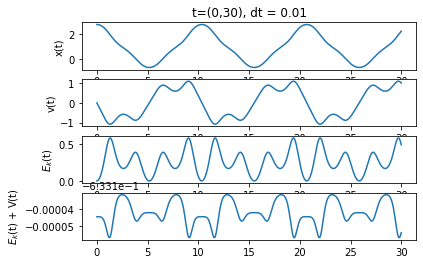

In [8]:
plt.subplot(4,1,1)
plt.plot(time,dane[0])
plt.ylabel('x(t)')
plt.title('t=(0,30), dt = 0.01')

plt.subplot(4,1,2)
plt.plot(time,dane[1])
plt.ylabel('v(t)')

plt.subplot(4,1,3)
plt.plot(time,dane[2])
plt.ylabel('$E_k$(t)')

plt.subplot(4,1,4)
plt.plot(time,dane[4])
plt.ylabel('$E_k$(t) + V(t)')



Text(0.5, 1.0, 't=(0,30), dt = 0.01')

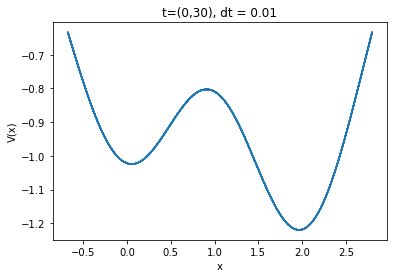

In [9]:
plt.plot(dane[0],dane[3])
plt.ylabel('V(x)')
plt.xlabel('x')
plt.title('t=(0,30), dt = 0.01')


In [10]:
dane = daneFun(30,0.001,0)
time = np.array(range(int(30/0.001)))*0.001


Text(0, 0.5, '$E_k$(t) + V(t)')

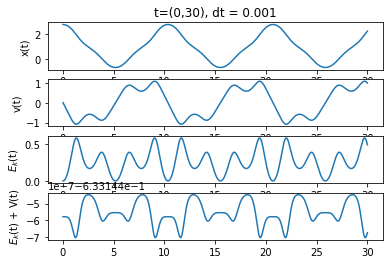

In [11]:
plt.subplot(4,1,1)
plt.plot(time,dane[0])
plt.ylabel('x(t)')
plt.title('t=(0,30), dt = 0.001')


plt.subplot(4,1,2)
plt.plot(time,dane[1])
plt.ylabel('v(t)')

plt.subplot(4,1,3)
plt.plot(time,dane[2])
plt.ylabel('$E_k$(t)')

plt.subplot(4,1,4)
plt.plot(time,dane[4])
plt.ylabel('$E_k$(t) + V(t)')


Text(0.5, 1.0, 't=(0,30), dt = 0.001')

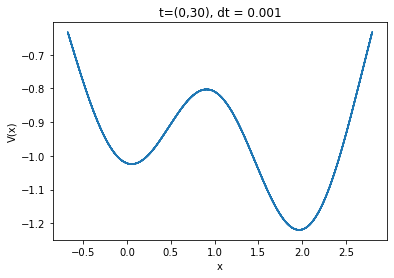

In [12]:
plt.plot(dane[0],dane[3])
plt.xlabel('x')
plt.ylabel('V(x)')
plt.title('t=(0,30), dt = 0.001')


In [13]:
dane100_001 = daneFun(100,0.01,0)
dane100_0001 = daneFun(100,0.001,0)
dane1000_001 = daneFun(1000,0.01,0)
dane1000_0001 = daneFun(1000,0.001,0)

Text(0.5, 0, 'x(t)')

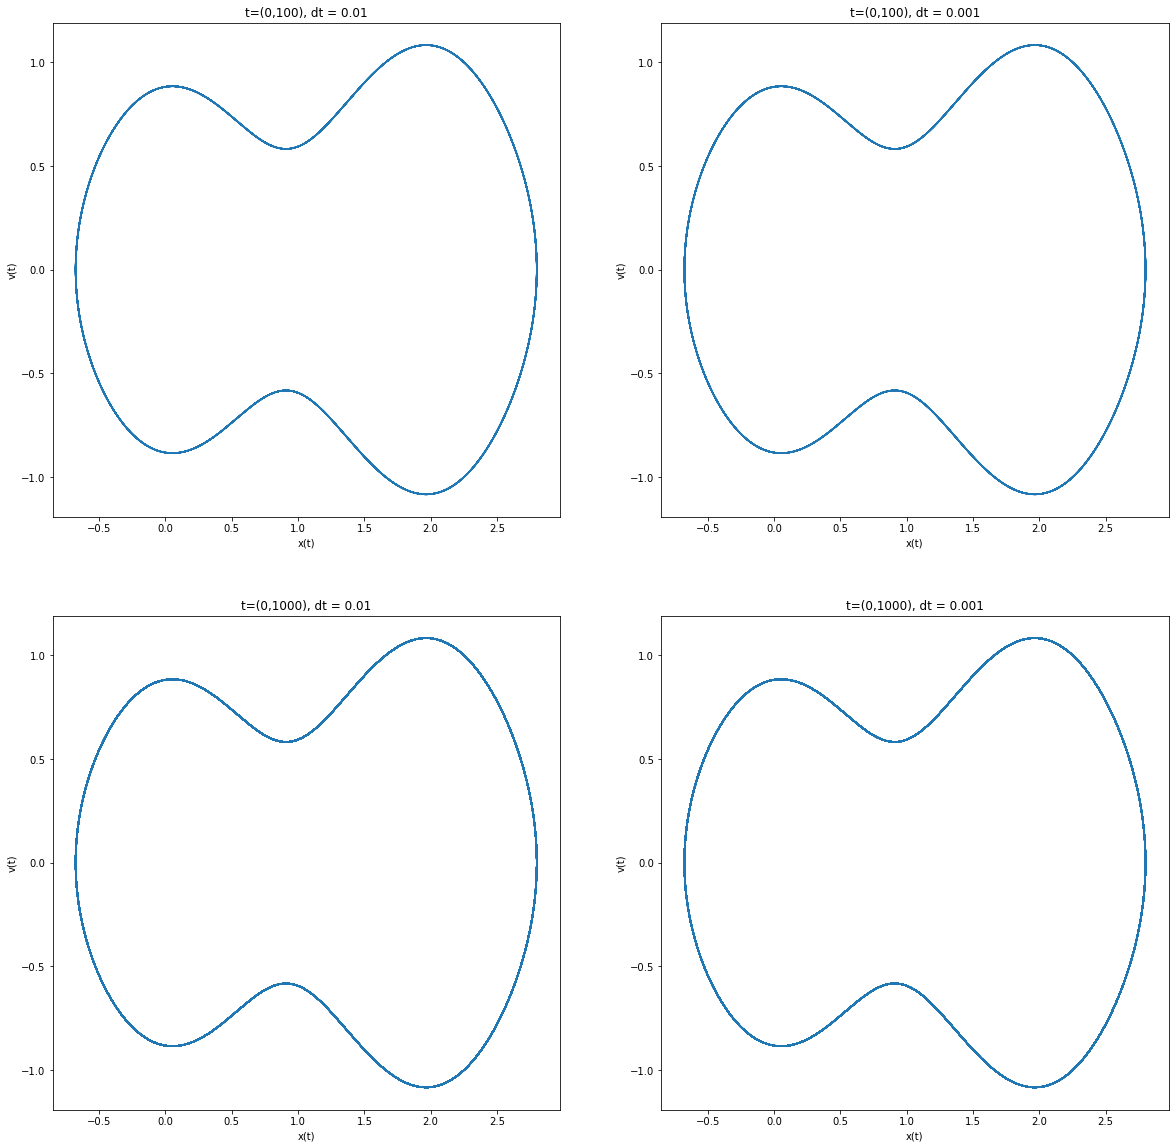

In [14]:
plt.figure(figsize=(20,20))

plt.subplot(2,2,1)
plt.plot(dane100_001[0],dane100_001[1])
plt.title('t=(0,100), dt = 0.01')
plt.ylabel('v(t)')
plt.xlabel('x(t)')

plt.subplot(2,2,2)
plt.plot(dane100_0001[0],dane100_0001[1])
plt.title('t=(0,100), dt = 0.001')
plt.ylabel('v(t)')
plt.xlabel('x(t)')

plt.subplot(2,2,3)
plt.plot(dane1000_001[0],dane1000_001[1])
plt.title('t=(0,1000), dt = 0.01')
plt.ylabel('v(t)')
plt.xlabel('x(t)')

plt.subplot(2,2,4)
plt.plot(dane1000_0001[0],dane1000_0001[1])
plt.title('t=(0,1000), dt = 0.001')
plt.ylabel('v(t)')
plt.xlabel('x(t)')


Text(0, 0.5, '$E_k$(t) + V(t)')

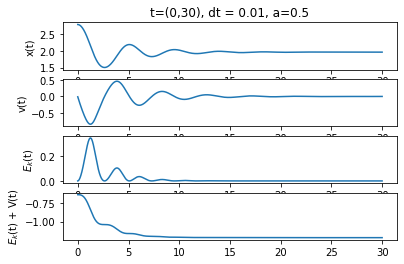

In [15]:
dane = daneFun(30,0.01,0.5)
time = np.array(range(int(30/0.01)))*0.01

plt.subplot(4,1,1)
plt.plot(time,dane[0])
plt.ylabel('x(t)')
plt.title('t=(0,30), dt = 0.01, a=0.5')


plt.subplot(4,1,2)
plt.plot(time,dane[1])
plt.ylabel('v(t)')

plt.subplot(4,1,3)
plt.plot(time,dane[2])
plt.ylabel('$E_k$(t)')

plt.subplot(4,1,4)
plt.plot(time,dane[4])
plt.ylabel('$E_k$(t) + V(t)')

Text(0.5, 1.0, 't=(0,30), dt = 0.01, a=0.5')

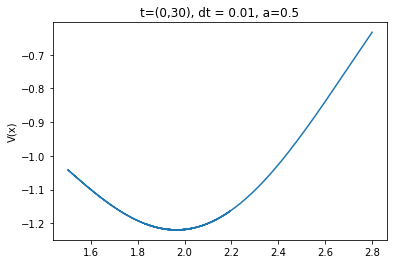

In [16]:
plt.plot(dane[0],dane[3])
plt.ylabel('V(x)')
plt.title('t=(0,30), dt = 0.01, a=0.5')


Text(0, 0.5, '$E_k$(t) + V(t)')

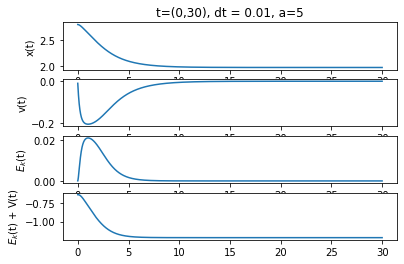

In [17]:
dane = daneFun(30,0.01,5)
time = np.array(range(int(30/0.01)))*0.01

plt.subplot(4,1,1)
plt.plot(time,dane[0])
plt.ylabel('x(t)')
plt.title('t=(0,30), dt = 0.01, a=5')


plt.subplot(4,1,2)
plt.plot(time,dane[1])
plt.ylabel('v(t)')

plt.subplot(4,1,3)
plt.plot(time,dane[2])
plt.ylabel('$E_k$(t)')

plt.subplot(4,1,4)
plt.plot(time,dane[4])
plt.ylabel('$E_k$(t) + V(t)')

Text(0.5, 1.0, 't=(0,30), dt = 0.01, a=5')

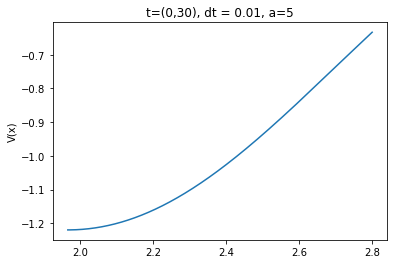

In [18]:
plt.plot(dane[0],dane[3])
plt.ylabel('V(x)')
plt.title('t=(0,30), dt = 0.01, a=5')


Text(0, 0.5, '$E_k$(t) + V(t)')

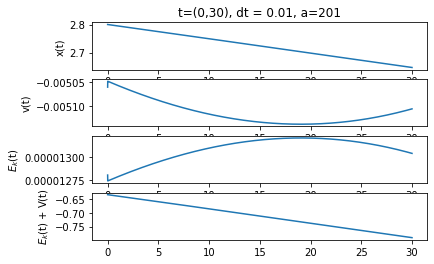

In [19]:
dane = daneFun(30,0.01,201)
time = np.array(range(int(30/0.01)))*0.01

plt.subplot(4,1,1)
plt.plot(time,dane[0])
plt.ylabel('x(t)')
plt.title('t=(0,30), dt = 0.01, a=201')


plt.subplot(4,1,2)
plt.plot(time,dane[1])
plt.ylabel('v(t)')

plt.subplot(4,1,3)
plt.plot(time,dane[2])
plt.ylabel('$E_k$(t)')

plt.subplot(4,1,4)
plt.plot(time,dane[4])
plt.ylabel('$E_k$(t) + V(t)')

Text(0.5, 1.0, 't=(0,30), dt = 0.01, a=201')

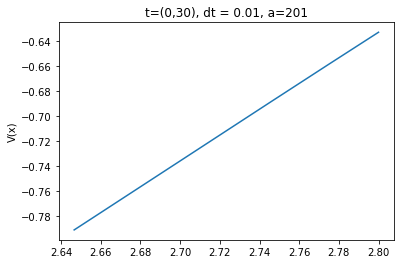

In [20]:
plt.plot(dane[0],dane[3])
plt.ylabel('V(x)')
plt.title('t=(0,30), dt = 0.01, a=201')


In [21]:
dane100_001_05 = daneFun(100,0.01,0)
dane100_001_5 = daneFun(100,0.01,0)
dane100_001_201 = daneFun(100,0.01,0)
dane1000_001_05 = daneFun(1000,0.01,0)
dane1000_001_5 = daneFun(1000,0.01,0)
dane1000_001_201 = daneFun(1000,0.01,0)

Text(0.5, 0, 'x(t)')

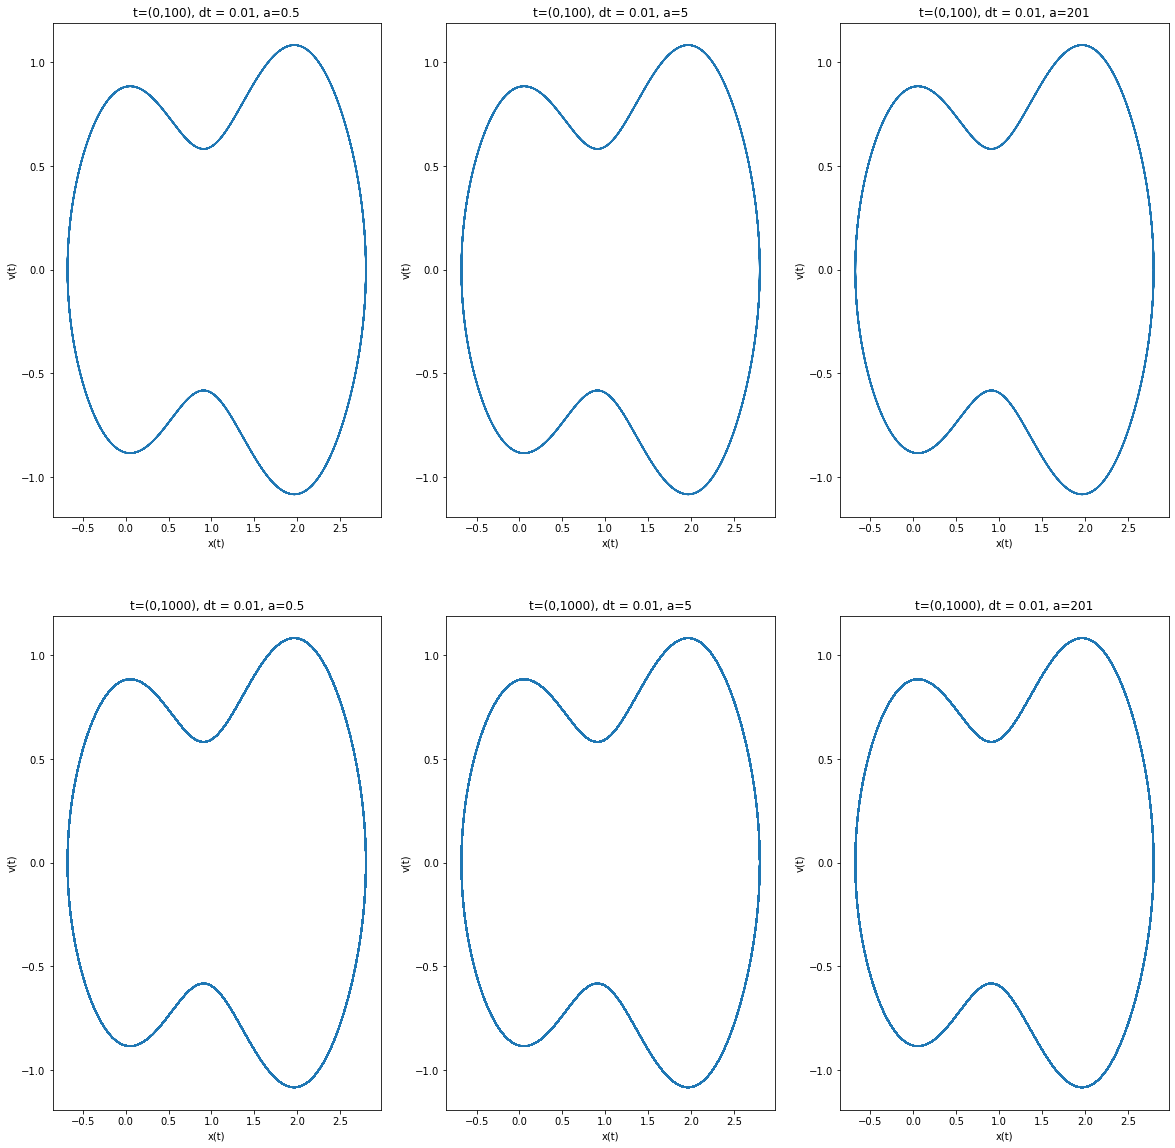

In [22]:
plt.figure(figsize=(20,20))

plt.subplot(2,3,1)
plt.plot(dane100_001_05[0],dane100_001_05[1])
plt.title('t=(0,100), dt = 0.01, a=0.5')
plt.ylabel('v(t)')
plt.xlabel('x(t)')

plt.subplot(2,3,2)
plt.plot(dane100_001_5[0],dane100_001_5[1])
plt.title('t=(0,100), dt = 0.01, a=5')
plt.ylabel('v(t)')
plt.xlabel('x(t)')

plt.subplot(2,3,3)
plt.plot(dane100_001_201[0],dane100_001_201[1])
plt.title('t=(0,100), dt = 0.01, a=201')
plt.ylabel('v(t)')
plt.xlabel('x(t)')

plt.subplot(2,3,4)
plt.plot(dane1000_001_05[0],dane1000_001_05[1])
plt.title('t=(0,1000), dt = 0.01, a=0.5')
plt.ylabel('v(t)')
plt.xlabel('x(t)')

plt.subplot(2,3,5)
plt.plot(dane1000_001_5[0],dane1000_001_5[1])
plt.title('t=(0,1000), dt = 0.01, a=5')
plt.ylabel('v(t)')
plt.xlabel('x(t)')

plt.subplot(2,3,6)
plt.plot(dane1000_001_201[0],dane1000_001_201[1])
plt.title('t=(0,1000), dt = 0.01, a=201')
plt.ylabel('v(t)')
plt.xlabel('x(t)')

In [23]:
x0 = 2.8
v0 = 0
polozenie = [x0]
predkosc = [v0]


def equations2(p):
    x1, v1 = p
    eqn_1 = x1 - x0 - dt/2 * v1 - dt/2 * v0
    eqn_2 = v1 - v0 -dt/2 * (-1/m * dV(x1) - alpha * v1) - dt/2 * (-1/m * dV(x0) - alpha * v0)
    return (eqn_1,eqn_2)

for i in range(int(T/dt)):
    C1, C2 = fsolve(equations2, (1,1))
    x0 = C1
    v0 = C2
    polozenie.append(x0)
    predkosc.append(v0)

/usr/lib/python3/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


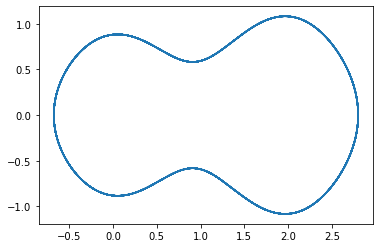

In [24]:
plt.plot(polozenie,predkosc)